# Implement SGD on Linear Regression using Boston Home Price Dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

C:\Users\GauravP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston.data.shape

(506, 13)

In [7]:
columnNames = boston.feature_names
columnNames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
Data = pd.DataFrame(boston.data, columns = columnNames)

In [9]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
Data_Labels = boston.target
Data_Labels.shape

(506,)

In [11]:
Data["PRICE"] = Data_Labels

In [12]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
Data.shape

(506, 14)

In [14]:
# weight = np.random.rand(13, 1)  # defining initial random weight

In [15]:
# weight

In [16]:
# print(type(weight))

In [17]:
# b = np.random.random()   # generating initial random y-intercept
# b

In [18]:
# np.dot(weight.T, Data.iloc[0])

In [19]:
# for i in range(len(weight)):
#     weight[i][0] = weight[i][0] - Data.iloc[0].values[i]

In [20]:
# weight

In [21]:
# print(Data.iloc[0].values[0])

In [22]:
# weight[11][0]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"], test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [24]:
m = X_train.shape[0]

**Performing Stochastic Gradient Descent by taking 10 random samples**

In [25]:
weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

learningRate = 0.2

for i in range(2500):    # running 2500 iterations
    Data_batch_10 = X_train.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False)
    X_std = StandardScaler().fit_transform(X_temp)
    X = pd.DataFrame(X_std, columns = columnNames)
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
#     print("Partial Gradient = "+str(PartialGradient))
#     print("Iteration number = "+str(i))
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

Weight = [-0.32149077  0.9982537   0.29047732  1.27605095 -1.06511298  3.04382499
  1.05440704 -1.84683024  2.35400459 -1.59350102 -1.53593969  0.60975559
 -4.62227638]
b = [23.70362149]


In [26]:
import math
test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
test_std = StandardScaler().fit_transform(test_temp)
test_data = pd.DataFrame(test_std, columns = columnNames)
test_labels = Y_test
y_predicted = []

for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using min values of weight obtained from SGD
    y_predicted.append(test_i)
    
y_true = []
for i in range(102):
    y_true.append(test_labels.iloc[i])

In [27]:
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)
df1

,True Labels,Predicted Labels
307,28.2,33.574712
385,7.2,9.976670
36,20.0,22.681121
380,10.4,23.861470
409,27.5,23.335253
414,7.0,-0.529739
178,29.9,32.621376
341,32.7,32.601284
302,26.4,28.449411
86,22.5,21.823519


In [28]:
Mean_Sq_Error = mean_squared_error(y_true, y_predicted)
Mean_Sq_Error

21.186227759904064

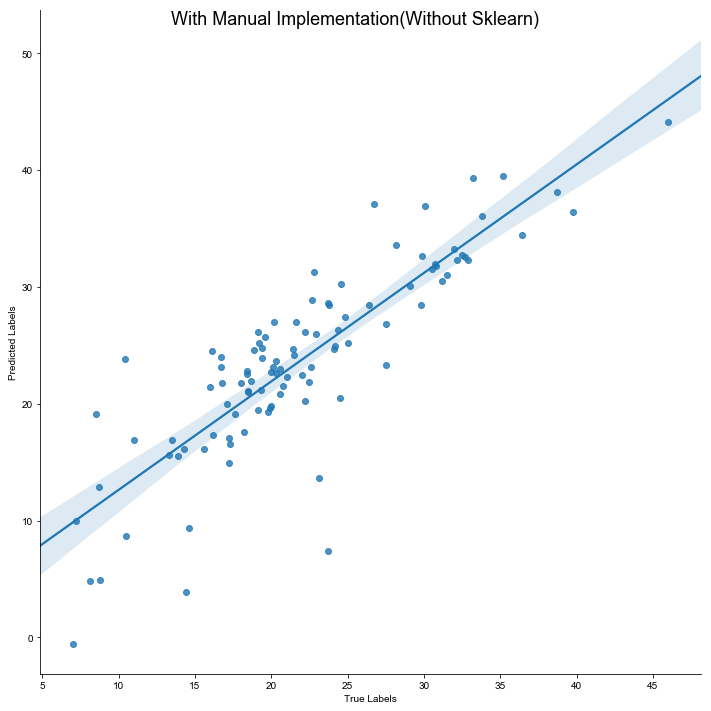

In [29]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10)

fig1 = lm1.fig 

fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)

sns.set(font_scale = 1.5)

In [30]:
X_temp = X_train.drop("PRICE", axis = 1, inplace = False)
X_std = StandardScaler().fit_transform(X_temp)
X = pd.DataFrame(X_std, columns = columnNames)
Y = Y_train

X_test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
X_test_std = StandardScaler().fit_transform(X_test_temp)
X_te = pd.DataFrame(X_test_std, columns = columnNames)
Y_te = Y_test

clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', n_iter = 2500)
clf.fit(X, Y)

Y_pred = clf.predict(X_te)

print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.89269428  1.00193127  0.13084557  0.60707741 -2.18656679  2.65855319
  0.48883977 -3.1378251   3.06195059 -2.31933488 -2.2108428   0.98680097
 -4.40275391]
Y Intercept = [22.69923301]


C:\Users\GauravP\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [31]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
307,28.2,34.625922
385,7.2,8.343819
36,20.0,23.316409
380,10.4,17.438339
409,27.5,20.622426
414,7.0,-4.672888
178,29.9,33.368859
341,32.7,31.891682
302,26.4,29.890827
86,22.5,22.931960


In [32]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

18.601333691948366

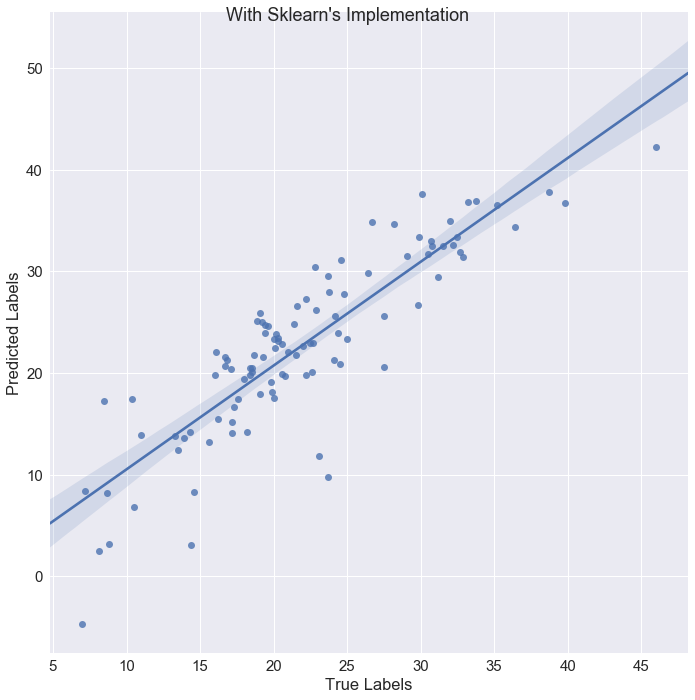

In [33]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10)

fig2 = lm2.fig 

# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)

## Final Verdict:
### Mean Square Error
<b>Manual Implementation: 21.186</b><br>
<b>Sklearn Implementation: 18.60</b>